In [17]:
import xml.etree.ElementTree as et

In [18]:
tree = et.parse('osm_maps/map.osm.xml')
root = tree.getroot()

In [19]:
len(root)

1812

In [20]:
len(root.findall('node'))

1715

In [21]:
len(root.findall('way'))

88

In [22]:
len(root.findall('relation'))

8

In [23]:
len(root.findall('bounds'))

1

In [24]:
19262 + 2839 + 80 + 1

22182

In [25]:
# Create dictionary of all nodes in the map (by id)

nodes = {}
for node in root.findall('node'):
    id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    nodes[id] = (lat, lon)

In [26]:
#nodes['31504505']

In [27]:
streets = []
for way in root.findall('way'):
    for tag in way.findall('tag'):
        if tag.get('k') == 'highway':
            line = []
            for nd in way.findall('nd'):
                coords = nodes[nd.get('ref')]
                line.append(coords)
            
            speedlimit = -1.0
            for tag in way.findall('tag'):
                if tag.get('k') == 'maxspeed':
                    speedlimit = int(tag.get('v'))
    
            streets.append({'speedlimit': speedlimit, 'line': line})

In [28]:
len(streets)

51

In [29]:
streets[3]['speedlimit']

-1.0

In [30]:
streets[3]['line']

[(47.3250458, 17.9913796), (47.3235709, 17.9924481)]

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

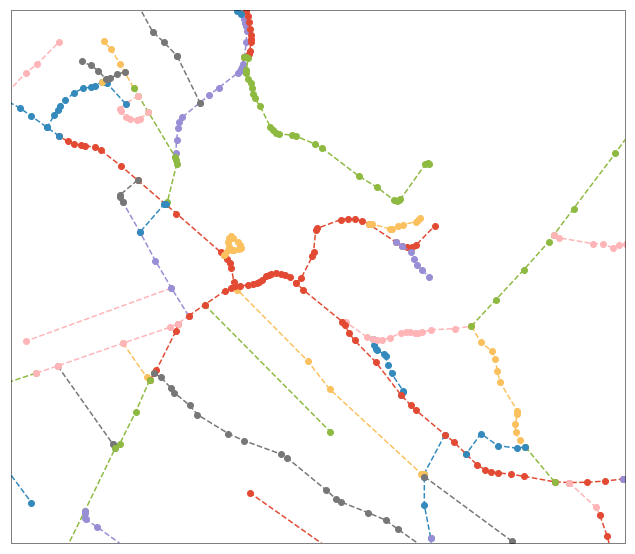

In [32]:
plt.figure(figsize = (11, 11))
    
img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
#ax.set_extent((9.8457000, 9.8852000, 53.2732000, 53.29710005))
ax.set_extent((17.9836000, 18.0123000, 47.3096000, 47.3265000))
#ax.set_extent((17.956100, 18.002500, 47.313100, 47.319200))
    
#ax.add_image(img, 12, interpolation = 'bicubic')

for street in streets:
    lats = []
    lons = []
    for (x, y) in street['line']:
        lats.append(x)
        lons.append(y)
    
    plt.plot(lons, lats, 'o--', transform=ccrs.PlateCarree())

(17.945147, 18.0201297, 47.2902535, 47.334994)


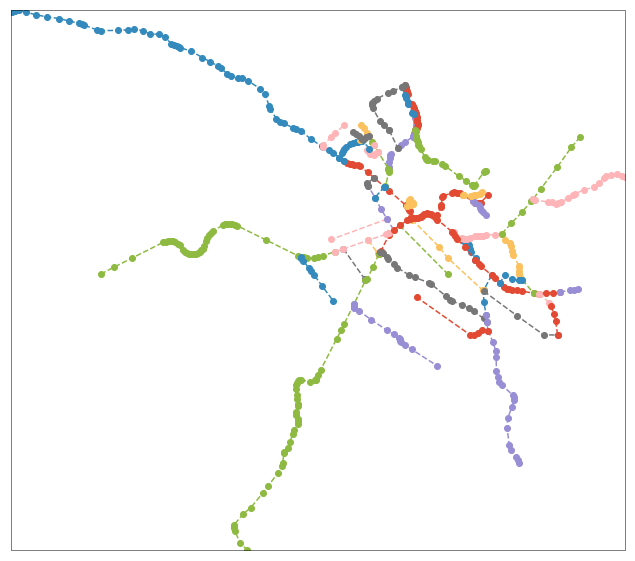

In [38]:
plt.figure(figsize = (11, 11))
    
img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
#ax.set_extent((9.8457000, 9.8852000, 53.2732000, 53.29710005))
#ax.set_extent((17.9836000, 18.0123000, 47.3096000, 47.3265000))
#ax.set_extent((17.956100, 18.002500, 47.313100, 47.319200))
    
#ax.add_image(img, 12, interpolation = 'bicubic')
minlon = None
maxlon = None
minlat = None
maxlat = None

for street in streets:
    lats = []
    lons = []
    for (x, y) in street['line']:
        lats.append(x)
        lons.append(y)
    
    plt.plot(lons, lats, 'o--', transform=ccrs.PlateCarree())
    
    if (minlon == None) or (min(lons) < minlon):
        minlon = min(lons)
    if (maxlon == None) or (max(lons) > maxlon):
        maxlon = max(lons)
    if (minlat == None) or (min(lats) < minlat):
        minlat = min(lats)
    if (maxlat == None) or (max(lats) > maxlat):
        maxlat = max(lats)

ax.set_extent((minlon, maxlon, minlat, maxlat))
print((minlon, maxlon, minlat, maxlat))

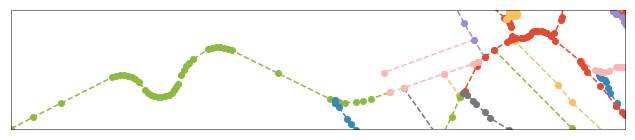

In [16]:
plt.figure(figsize = (11, 11))
    
img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
#ax.set_extent((9.8457000, 9.8852000, 53.2732000, 53.29710005))
#ax.set_extent((17.9836000, 18.0123000, 47.3096000, 47.3265000))
ax.set_extent((17.956100, 18.002500, 47.313100, 47.319200))
    
#ax.add_image(img, 12, interpolation = 'bicubic')

for street in streets:
    lats = []
    lons = []
    for (x, y) in street['line']:
        lats.append(x)
        lons.append(y)
    
    plt.plot(lons, lats, 'o--', transform=ccrs.PlateCarree())

In [ ]:
import pickle

with open('osm_maps/streets_cseteny.pkl', 'wb') as file:
    pickle.dump(streets, file)